<a href="https://colab.research.google.com/github/GerardoHH/Reborn/blob/main/colab/02_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [2]:
train_samples = []
train_labels = []

for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [3]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [5]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [6]:
model = Sequential([
      Dense(units=16, input_shape=(1,), activation='relu'),
      Dense(units=32, activation='relu'),
      Dense(units=2, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 3s - loss: 0.7025 - accuracy: 0.5190 - val_loss: 0.6884 - val_accuracy: 0.6619 - 3s/epoch - 17ms/step
Epoch 2/30
189/189 - 0s - loss: 0.6743 - accuracy: 0.6550 - val_loss: 0.6601 - val_accuracy: 0.6810 - 359ms/epoch - 2ms/step
Epoch 3/30
189/189 - 0s - loss: 0.6416 - accuracy: 0.7450 - val_loss: 0.6264 - val_accuracy: 0.7619 - 342ms/epoch - 2ms/step
Epoch 4/30
189/189 - 0s - loss: 0.6106 - accuracy: 0.7772 - val_loss: 0.5971 - val_accuracy: 0.7810 - 344ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.5806 - accuracy: 0.8005 - val_loss: 0.5666 - val_accuracy: 0.8048 - 384ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.5492 - accuracy: 0.8206 - val_loss: 0.5347 - val_accuracy: 0.8143 - 349ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.5169 - accuracy: 0.8450 - val_loss: 0.5025 - val_accuracy: 0.8286 - 345ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.4854 - accuracy: 0.8582 - val_loss: 0.4710 - val_accuracy: 0.8429 - 348ms/epoch - 2ms/step
Ep

In [12]:
test_labels = []
test_samples = []

for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [13]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [14]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [15]:
predictions

array([[0.9638875 , 0.0361125 ],
       [0.4620446 , 0.5379554 ],
       [0.96449286, 0.03550718],
       [0.04365381, 0.9563462 ],
       [0.56335163, 0.4366483 ],
       [0.96234196, 0.03765804],
       [0.9632648 , 0.03673516],
       [0.7176684 , 0.28233156],
       [0.3957096 , 0.60429037],
       [0.5963803 , 0.40361968],
       [0.03194438, 0.96805555],
       [0.22493164, 0.77506834],
       [0.04644464, 0.9535554 ],
       [0.9639697 , 0.03603033],
       [0.22493164, 0.77506834],
       [0.7692685 , 0.23073149],
       [0.03401324, 0.9659868 ],
       [0.9636399 , 0.03636006],
       [0.07124721, 0.92875284],
       [0.9636399 , 0.03636006],
       [0.02816575, 0.97183424],
       [0.56335163, 0.4366483 ],
       [0.14434338, 0.8556567 ],
       [0.11428543, 0.8857146 ],
       [0.30358922, 0.69641083],
       [0.7924596 , 0.20754042],
       [0.07124721, 0.92875284],
       [0.36377785, 0.6362221 ],
       [0.14434338, 0.8556567 ],
       [0.22493164, 0.77506834],
       [0.

In [16]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [17]:
rounded_predictions

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [18]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [20]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [21]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix without Normalization")

  print(cm)

  thresh = cm.max() / 2.0

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.xlabel('Predicted label')
  plt.ylabel('True label')

Confusion Matrix without Normalization
[[187  23]
 [ 10 200]]


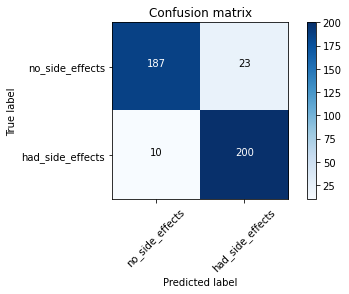

In [22]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)

In [23]:
import os.path
if os.path.isfile('medical_trial_model.h5') is False:
  model.save('medical_trial_model.h5')
  print("Model Saved!")

Model Saved!


In [24]:
from tensorflow.keras.models import load_model
new_model = load_model('medical_trial_model.h5')

In [25]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [26]:
new_model.get_weights()

[array([[ 0.63092405,  0.30851337, -0.20011145, -0.5881327 , -0.08089966,
          0.29583642,  0.24997512, -0.33803767, -0.5204398 , -0.4469375 ,
         -0.02702016, -0.39189398,  0.05957627, -0.23075211,  0.5641184 ,
          0.78804326]], dtype=float32),
 array([-0.12557173, -0.0961851 ,  0.        ,  0.        ,  0.        ,
        -0.09853654, -0.08665354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.25452453,  0.        , -0.13258545,
        -0.13735163], dtype=float32),
 array([[-2.48406678e-01,  3.69481981e-01,  3.59392732e-01,
          1.86074406e-01, -4.28826749e-01,  5.46690226e-01,
          3.10291588e-01,  1.00438103e-01,  1.66485816e-01,
         -2.08012462e-01,  1.03169411e-01, -1.26951799e-01,
         -2.42222309e-01, -1.41030267e-01, -3.02212328e-01,
          4.98479128e-01,  1.78605556e-01,  8.76380801e-02,
         -3.71907562e-01,  1.61309272e-01, -1.47079499e-02,
         -1.49505407e-01, -1.51884332e-01, -2.19714403e-01,
 

In [27]:
new_model.optimizer

In [28]:
json_string = model.to_json()

In [29]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [30]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [31]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [32]:
import os.path
if os.path.isfile('my_model_weights.h5') is False:
  model.save_weights('my_model_weights.h5')
  print("Model Saved!")

Model Saved!


In [34]:
model2 = Sequential([
      Dense(units=16, input_shape=(1,), activation='relu'),
      Dense(units=32, activation='relu'),
      Dense(units=2, activation='softmax')
])

In [35]:
model2.load_weights('my_model_weights.h5')

In [36]:
model2.get_weights()

[array([[ 0.63092405,  0.30851337, -0.20011145, -0.5881327 , -0.08089966,
          0.29583642,  0.24997512, -0.33803767, -0.5204398 , -0.4469375 ,
         -0.02702016, -0.39189398,  0.05957627, -0.23075211,  0.5641184 ,
          0.78804326]], dtype=float32),
 array([-0.12557173, -0.0961851 ,  0.        ,  0.        ,  0.        ,
        -0.09853654, -0.08665354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.25452453,  0.        , -0.13258545,
        -0.13735163], dtype=float32),
 array([[-2.48406678e-01,  3.69481981e-01,  3.59392732e-01,
          1.86074406e-01, -4.28826749e-01,  5.46690226e-01,
          3.10291588e-01,  1.00438103e-01,  1.66485816e-01,
         -2.08012462e-01,  1.03169411e-01, -1.26951799e-01,
         -2.42222309e-01, -1.41030267e-01, -3.02212328e-01,
          4.98479128e-01,  1.78605556e-01,  8.76380801e-02,
         -3.71907562e-01,  1.61309272e-01, -1.47079499e-02,
         -1.49505407e-01, -1.51884332e-01, -2.19714403e-01,
 